# **Web Scrape Tweets using SNTWITTER**

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-fen0lf_x
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-fen0lf_x
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit 0d824ab77334ed4ab6250e5e491171afeccfb298
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('mental health since:2023-01-17 until:2023-06-17').get_items()):
    if i>5000:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])

tweets_df

<ipython-input-26-2fa3646d7068>:11: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])


,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,stellamaree_,2023-06-16 23:59:59+00:00,1,None,Normalize mental health breaks!!!
1,fullbackrevival,2023-06-16 23:59:51+00:00,1,None,@georgeoisie1 Absolutely not I have mental health
2,dreamoflorien,2023-06-16 23:59:45+00:00,4,None,"https://t.co/z0k5Z6C1pI\nhi all, i think im ta..."
3,BeansalotJr,2023-06-16 23:59:37+00:00,0,None,my mental health must be worse than I thought ...
4,WrangerJK,2023-06-16 23:59:37+00:00,0,None,@CODLeague @SimpXO Leave children alone
...,...,...,...,...,...
4996,ItsMe50474936,2023-06-16 18:50:15+00:00,0,None,@atalanta44 @DieMadTerf You're not. You are a ...
4997,devowilliAM,2023-06-16 18:50:12+00:00,0,None,@TheNBACentral Just don’t wave a gun around. M...
4998,mariaisbackk,2023-06-16 18:50:12+00:00,3,None,Weil moini gemacht hat mach ich auch\n\nlooks:...
4999,seattlebrief,2023-06-16 18:50:05+00:00,0,None,Federal judge blasts WA officials for mental h...


# **Download Files**

In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('tweets_df.csv', 'w') as f:
  f.write(tweets_df.to_csv())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cat df.json

cat: df.json: No such file or directory


In [ ]:
# Download the file.
from google.colab import files
files.download('tweets_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploratory Data Analysis (EDA)**

## **Preprocessing data & Sentiment Analysis**

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd

In [ ]:
tweets_df.head(50)

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,stellamaree_,2023-06-16 23:59:59+00:00,1,None,Normalize mental health breaks!!!
1,fullbackrevival,2023-06-16 23:59:51+00:00,1,None,@georgeoisie1 Absolutely not I have mental health
2,dreamoflorien,2023-06-16 23:59:45+00:00,4,None,"https://t.co/z0k5Z6C1pI\nhi all, i think im ta..."
3,BeansalotJr,2023-06-16 23:59:37+00:00,0,None,my mental health must be worse than I thought ...
4,WrangerJK,2023-06-16 23:59:37+00:00,0,None,@CODLeague @SimpXO Leave children alone
5,mintsroses,2023-06-16 23:59:37+00:00,1,None,I have so many ghostfang fanart ideas in my he...
6,saddayitis,2023-06-16 23:59:32+00:00,2,None,@tammyri93981707 @bobmackin Hey wasn't Jennife...
7,matt02922,2023-06-16 23:59:25+00:00,0,None,@C0alhands @hutchinson That’s a lot of words t...
8,wolfofballmeat,2023-06-16 23:59:21+00:00,0,None,@ArtByJenk @fewocious @windsandnstars He's hav...
9,Crownescent,2023-06-16 23:59:16+00:00,1,None,#mentalhealth @KelliDrenner #StayPositive Ment...


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   User             5001 non-null   object             
 1   Date Created     5001 non-null   datetime64[ns, UTC]
 2   Number of Likes  5001 non-null   int64              
 3   Source of Tweet  0 non-null      object             
 4   Tweet            5001 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 195.5+ KB


In [ ]:
# identify missing value
tweets_df.isna().sum()

User                  0
Date Created          0
Number of Likes       0
Source of Tweet    5001
Tweet                 0
dtype: int64

In [ ]:
# delete 'Source of Tweet' column
del tweets_df['Source of Tweet']

In [ ]:
# identify missing value
tweets_df.isna().sum()

User               0
Date Created       0
Number of Likes    0
Tweet              0
dtype: int64

In [ ]:
tweets_df.head(10)

,User,Date Created,Number of Likes,Tweet
0,stellamaree_,2023-06-16 23:59:59+00:00,1,Normalize mental health breaks!!!
1,fullbackrevival,2023-06-16 23:59:51+00:00,1,@georgeoisie1 Absolutely not I have mental health
2,dreamoflorien,2023-06-16 23:59:45+00:00,4,"https://t.co/z0k5Z6C1pI\nhi all, i think im ta..."
3,BeansalotJr,2023-06-16 23:59:37+00:00,0,my mental health must be worse than I thought ...
4,WrangerJK,2023-06-16 23:59:37+00:00,0,@CODLeague @SimpXO Leave children alone
5,mintsroses,2023-06-16 23:59:37+00:00,1,I have so many ghostfang fanart ideas in my he...
6,saddayitis,2023-06-16 23:59:32+00:00,2,@tammyri93981707 @bobmackin Hey wasn't Jennife...
7,matt02922,2023-06-16 23:59:25+00:00,0,@C0alhands @hutchinson That’s a lot of words t...
8,wolfofballmeat,2023-06-16 23:59:21+00:00,0,@ArtByJenk @fewocious @windsandnstars He's hav...
9,Crownescent,2023-06-16 23:59:16+00:00,1,#mentalhealth @KelliDrenner #StayPositive Ment...


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Text cleaning
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Reconstruct the preprocessed text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

def get_sentiment(text):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  if polarity > 0:
    return "Positive"
  elif polarity < 0:
    return "Negative"
  else:
    return "Neutral"

def get_polarity(text):
  blob = TextBlob(text)
  polarity = blob.sentiment.polarity
  return polarity

# Preprocess the 'Tweet' column and add 'CleanedTweet' column
Cleanedtweets_df = tweets_df.copy()
Cleanedtweets_df['CleanedTweet'] = Cleanedtweets_df['Tweet'].apply(preprocess_text)

# Perform sentiment analysis on the preprocessed text
Cleanedtweets_df['Sentiment'] = Cleanedtweets_df['CleanedTweet'].apply(get_sentiment)
Cleanedtweets_df['Polarity'] = Cleanedtweets_df['CleanedTweet'].apply(get_polarity)

# Drop the original 'Tweet' column
Cleanedtweets_df.drop('Tweet', axis=1, inplace=True)

# View the updated DataFrame
Cleanedtweets_df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,User,Date Created,Number of Likes,CleanedTweet,Sentiment,Polarity
0,stellamaree_,2023-06-16 23:59:59+00:00,1,normalize mental health break,Negative,-0.100000
1,fullbackrevival,2023-06-16 23:59:51+00:00,1,georgeoisie absolutely mental health,Negative,-0.100000
2,dreamoflorien,2023-06-16 23:59:45+00:00,4,hi think im taking hiatus rp safety mental hea...,Negative,-0.100000
3,BeansalotJr,2023-06-16 23:59:37+00:00,0,mental health must worse thought even audacity...,Negative,-0.250000
4,WrangerJK,2023-06-16 23:59:37+00:00,0,codleague simpxo leave child alone,Neutral,0.000000
...,...,...,...,...,...,...
4996,ItsMe50474936,2023-06-16 18:50:15+00:00,0,atalanta diemadterf youre woman need get corre...,Negative,-0.100000
4997,devowilliAM,2023-06-16 18:50:12+00:00,0,thenbacentral dont wave gun around mental heal...,Neutral,0.000000
4998,mariaisbackk,2023-06-16 18:50:12+00:00,3,weil moini gemacht hat mach ich auch look crea...,Negative,-0.033333
4999,seattlebrief,2023-06-16 18:50:05+00:00,0,federal judge blast wa official mental health ...,Negative,-0.208333


In [ ]:
Cleanedtweets_df.head(10)

,User,Date Created,Number of Likes,CleanedTweet,Sentiment,Polarity
0,stellamaree_,2023-06-16 23:59:59+00:00,1,normalize mental health break,Negative,-0.100000
1,fullbackrevival,2023-06-16 23:59:51+00:00,1,georgeoisie absolutely mental health,Negative,-0.100000
2,dreamoflorien,2023-06-16 23:59:45+00:00,4,hi think im taking hiatus rp safety mental hea...,Negative,-0.100000
3,BeansalotJr,2023-06-16 23:59:37+00:00,0,mental health must worse thought even audacity...,Negative,-0.250000
4,WrangerJK,2023-06-16 23:59:37+00:00,0,codleague simpxo leave child alone,Neutral,0.000000
5,mintsroses,2023-06-16 23:59:37+00:00,1,many ghostfang fanart idea head im busy workin...,Positive,0.200000
6,saddayitis,2023-06-16 23:59:32+00:00,2,tammyri bobmackin hey wasnt jennifer whiteside...,Negative,-0.100000
7,matt02922,2023-06-16 23:59:25+00:00,0,calhands hutchinson thats lot word say absolut...,Positive,0.141667
8,wolfofballmeat,2023-06-16 23:59:21+00:00,0,artbyjenk fewocious windsandnstars he mental h...,Negative,-0.100000
9,Crownescent,2023-06-16 23:59:16+00:00,1,mentalhealth kellidrenner staypositive mental ...,Positive,0.050000


In [ ]:
# Save the DataFrame to a file on the Colab backend.
with open('Cleanedtweets_df.csv', 'w') as f:
  f.write(Cleanedtweets_df.to_csv())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Download the file.
from google.colab import files
files.download('Cleanedtweets_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Data Visualization**

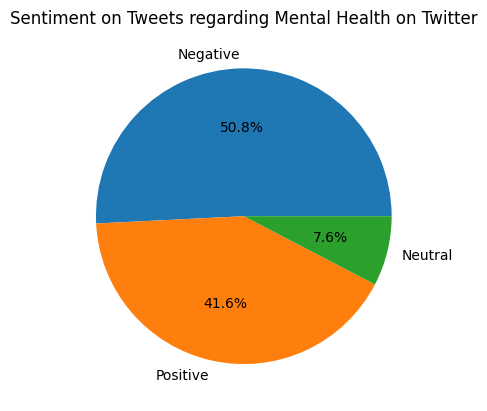

In [ ]:
import matplotlib.pyplot as plt

# Perform sentiment analysis on the preprocessed text
Cleanedtweets_df['Sentiment'] = Cleanedtweets_df['CleanedTweet'].apply(get_sentiment)

# Plot the sentiment distribution
sentiment_counts = Cleanedtweets_df['Sentiment'].value_counts()
labels = sentiment_counts.index

plt.pie(sentiment_counts, labels=labels, autopct="%1.1f%%")
plt.title("Sentiment on Tweets regarding Mental Health on Twitter")
plt.show()


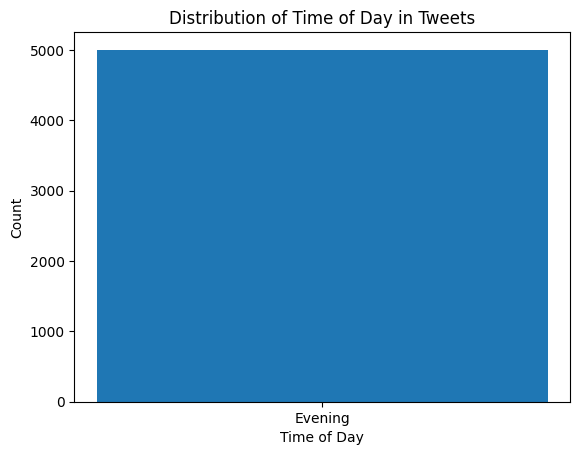

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Unix timestamps to datetime format
Cleanedtweets_df['Date Created'] = pd.to_datetime(Cleanedtweets_df['Date Created'], unit='ms')

# Extract hour from 'Date Created' column
Cleanedtweets_df['Hour'] = Cleanedtweets_df['Date Created'].dt.hour

# Categorize time of day
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply time categorization
Cleanedtweets_df['TimeOfDay'] = Cleanedtweets_df['Hour'].apply(categorize_time)

# Count the occurrences of each time of day
time_counts = Cleanedtweets_df['TimeOfDay'].value_counts()

# Create a bar chart
plt.bar(time_counts.index, time_counts.values)
plt.title('Distribution of Time of Day in Tweets')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

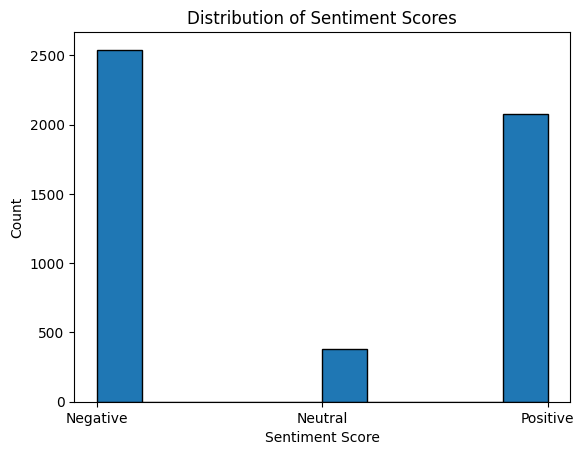

In [ ]:
import matplotlib.pyplot as plt

sentiment_scores = Cleanedtweets_df['Sentiment']

plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()

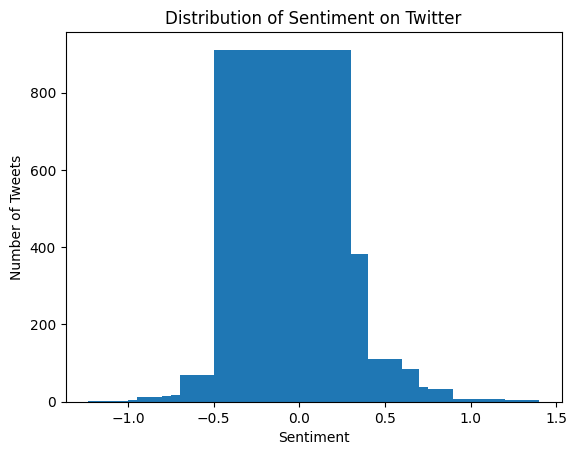

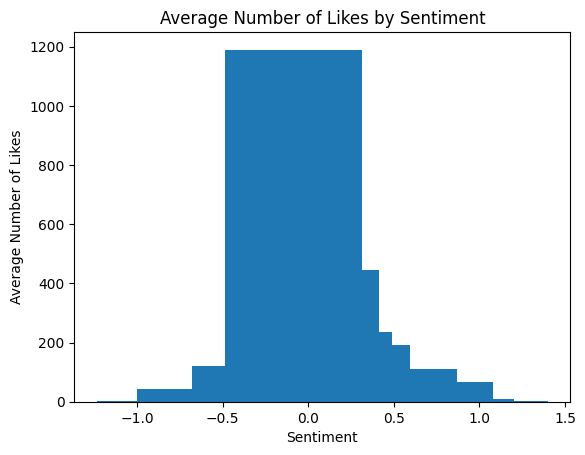

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe named `tweets_df` with the required columns

# Group the data by sentiment and count the number of tweets in each category
sentiment_counts = Cleanedtweets_df['Polarity'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiment on Twitter')
plt.show()

# Calculate the average number of likes per sentiment category
avg_likes = Cleanedtweets_df.groupby('Polarity')['Number of Likes'].mean()

# Plot the average number of likes per sentiment category
plt.bar(avg_likes.index, avg_likes.values)
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Likes')
plt.title('Average Number of Likes by Sentiment')
plt.show()

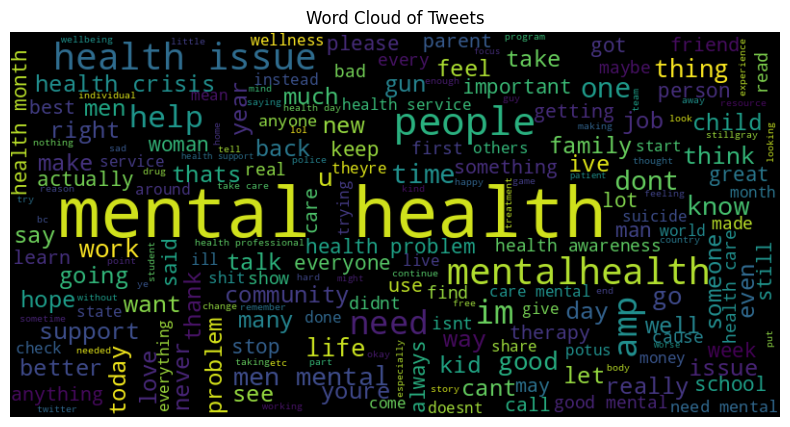

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all the preprocessed texts into a single string
all_text = ' '.join(Cleanedtweets_df['CleanedTweet'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

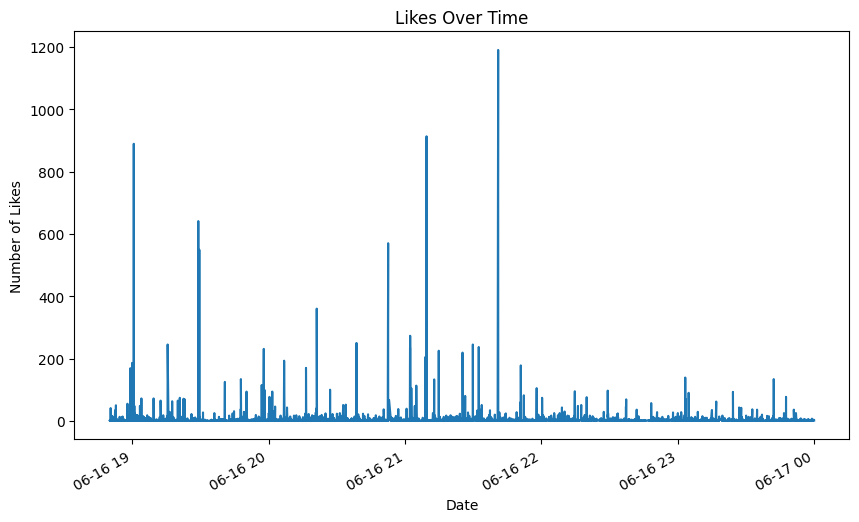

In [ ]:
import matplotlib.pyplot as plt


# Group the data by date and calculate the total number of likes for each day
likes_by_date = Cleanedtweets_df.groupby('Date Created')['Number of Likes'].sum()

# Plot the likes over time using a line chart
likes_by_date.plot(kind='line', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Number of Likes')
plt.title('Likes Over Time')
plt.show()